In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset= pd.read_csv('customer_churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Exploratory Data Analysis**

In [ ]:
# Checking For The Number of Rows and Columns In The Data
dataset.shape

(7043, 21)

In [ ]:
# Checking The DataTypes For Each Column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Checking For Missing Values In DataSet
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
## Basic Statistics
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
## Checking for Unique Values

for column in dataset.columns:
  if dataset[column].dtype == 'object':
      dictionary ={}
      dictionary[column] = dataset[column].unique()
      print(column, len(dataset[column].unique()))
      print()
      print(dictionary)



customerID 7043

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)}
gender 2

{'gender': array(['Female', 'Male'], dtype=object)}
Partner 2

{'Partner': array(['Yes', 'No'], dtype=object)}
Dependents 2

{'Dependents': array(['No', 'Yes'], dtype=object)}
PhoneService 2

{'PhoneService': array(['No', 'Yes'], dtype=object)}
MultipleLines 3

{'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object)}
InternetService 3

{'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object)}
OnlineSecurity 3

{'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object)}
OnlineBackup 3

{'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object)}
DeviceProtection 3

{'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object)}
TechSupport 3

{'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object)}
StreamingTV 3

{'StreamingTV': arra

**Mini Data Cleaning**

In [ ]:
# Converting The TotaclCharges Column to Numerical
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
print('Number of Missing Values are: ',dataset['TotalCharges'].isna().sum())
print('The Data Type for the Total Charges column: ',dataset['TotalCharges'].dtype)

Number of Missing Values are:  11
The Data Type for the Total Charges column:  float64


In [ ]:
## Filling the Missing Values for the Total Chagres Column
dataset.fillna(dataset['TotalCharges'].mean(), inplace=True)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Visualization**

**Distributions**

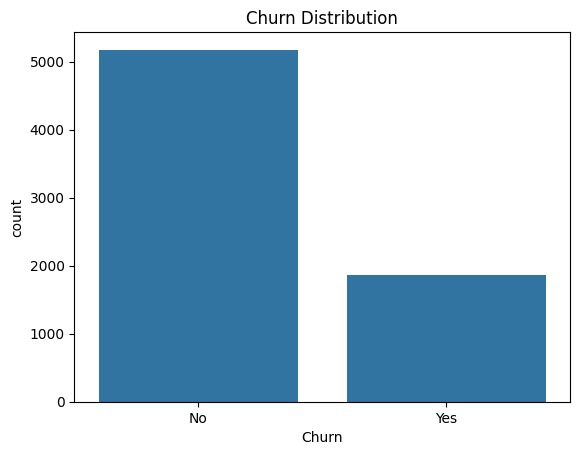

In [ ]:
# Churn Distribution
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=dataset)
plt.title('Churn Distribution')
plt.show()


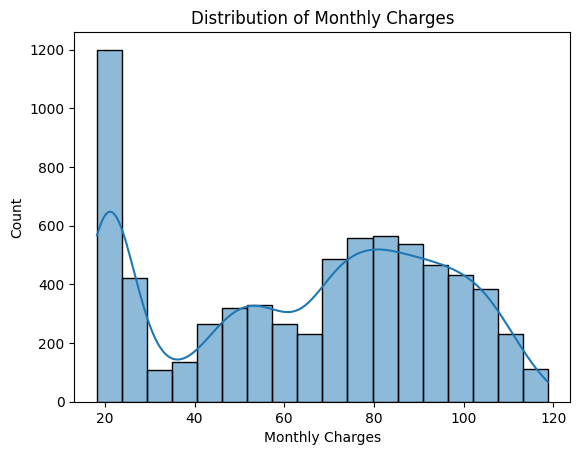

In [ ]:
# Monthly Charges Distribution
sns.histplot(dataset['MonthlyCharges'], kde=True)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Monthly Charges')
plt.show()


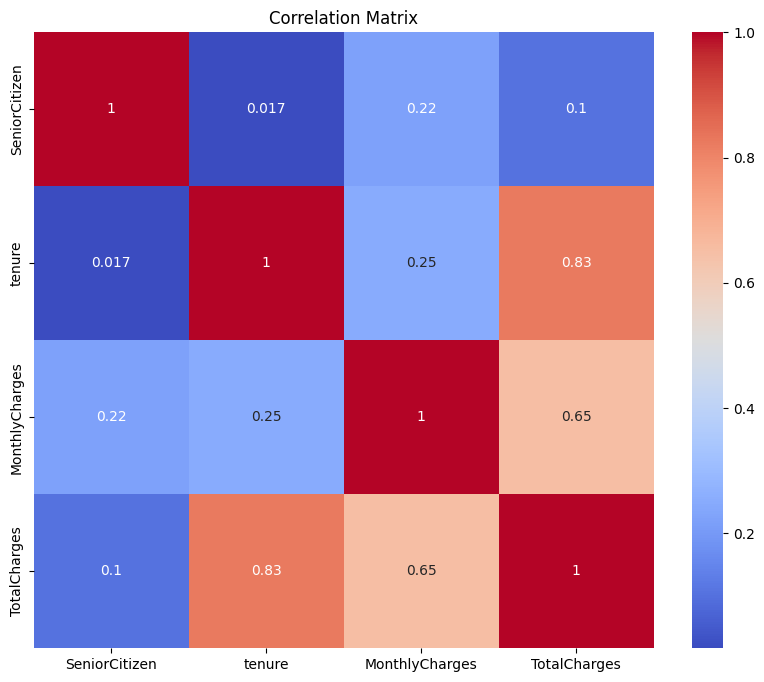

In [ ]:
# Correlation Analysis
corr_matrix = dataset.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Feature Relationships**

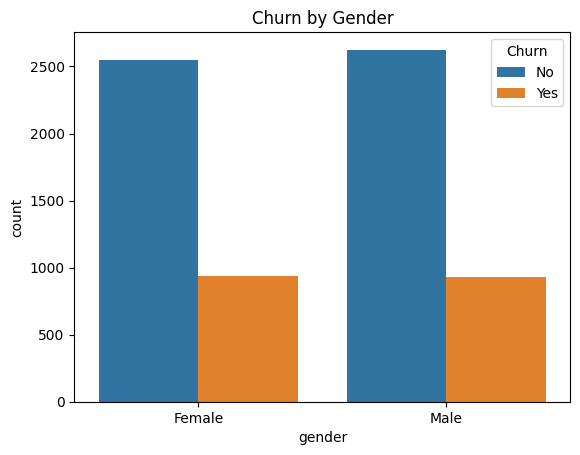

In [ ]:
# Gender vs Churn
sns.countplot(x='gender', hue='Churn', data=dataset)
plt.title('Churn by Gender')
plt.show()


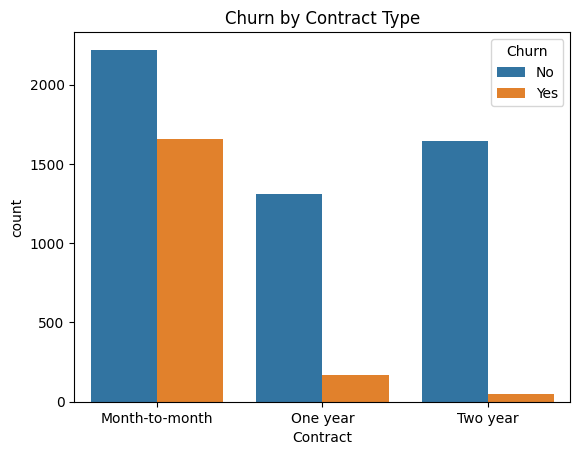

In [ ]:
# Contract vs Churn
sns.countplot(x='Contract', hue='Churn', data=dataset)
plt.title('Churn by Contract Type')
plt.show()


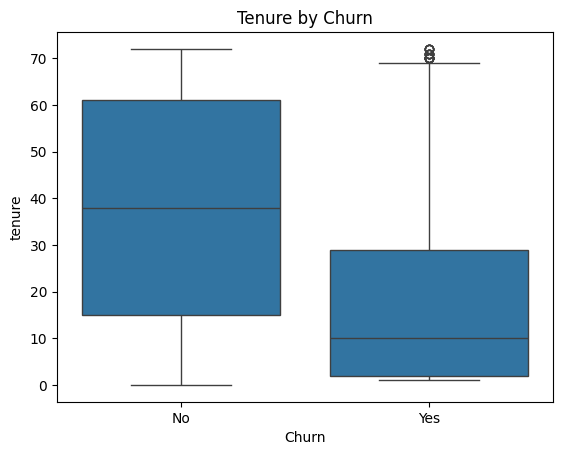

In [ ]:
# Churn vs Tenure
sns.boxplot(x='Churn', y='tenure', data=dataset)
plt.title('Tenure by Churn')
plt.show()


**Outlier Detection**

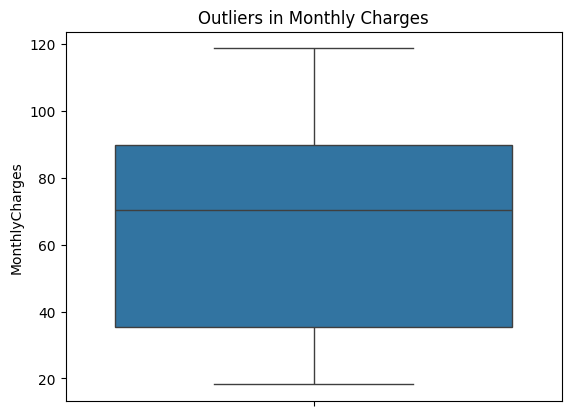

In [ ]:
# Identifying Outliers
sns.boxplot(data=dataset['MonthlyCharges'])
plt.title('Outliers in Monthly Charges')
plt.show()
